In [1]:
import numpy as np
import matplotlib.pyplot as plt
from planning import breadth_first_search
import math

np.set_printoptions(precision=2)

In [2]:
def elev_grid2occupancy_grid(elev_grid, dz_th=0.1, unexplored_value=0.5, safety_distance=0.3, map_res=0.15):
    
    def get_neighbours(elev_grid, point):
        row, col = point
        upleft = (row-1, col-1);   up = (row-1, col);   upright = (row-1, col+1)
        left = (row, col-1);                            right = (row, col+1)
        downleft = (row+1, col-1); down = (row+1, col); downright = (row+1, col+1)
        possible_neighbours = [upleft, up, upright, left, right, downleft, down, downright]
        nbrs = []
        for pn in possible_neighbours:
            if not math.isnan(elev_grid[pn[0], pn[1]]):
                nbrs.append(pn)
        return nbrs
    
    occupancy_grid = np.ones_like(elev_grid)*unexplored_value
    for row in range(2, elev_grid.shape[0]-2):
        for col in range(2, elev_grid.shape[1]-2):
            # print('point:', (row,col), 'neighbours:', neighbours(elev_grid, (row,col)))
            point = (row, col)
            if not math.isnan(elev_grid[row,col]):
                nbrs = get_neighbours(elev_grid, (row,col))
                for nb in nbrs:
                    # compute slope
                    dz = elev_grid[nb] - elev_grid[point]
                    # update occupancy grid
                    occupancy_grid[nb] = np.abs(dz) > dz_th
                    # inflate occupancy grid by robot size
                    if occupancy_grid[nb] == 1:
                        ws = int(safety_distance/map_res) # window size: ws*map_res~robot_size
                        rl = nb[0] - ws; rr = nb[0] + ws
                        cl = nb[1] - ws; cr = nb[1] + ws
                        occupancy_grid[rl:rr, cl:cr] = 1
    return occupancy_grid

In [3]:
def create_grid(elev_map, robot_z, map_res=0.15, margin=0.3, safety_distance=0.15, unexplored_value=0.5):
    
    # minimum and maximum east coordinates
    x_min = np.min(elev_map[:, 0])
    x_max = np.max(elev_map[:, 0])
    
    # minimum and maximum north coordinates
    y_min = np.min(elev_map[:, 1])
    y_max = np.max(elev_map[:, 1])

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    y_size = int((y_max - y_min)//map_res)
    x_size = int((x_max - x_min)//map_res)

    # Initialize an unexplored grid
    # unexplored: 0.5
    # free:        0
    # occupied:    1
    elev_grid  = np.full((x_size, y_size), np.nan)

    # Populate the grid with obstacles
    for i in range(elev_map.shape[0]):
        x, y, z, _ = elev_map[i, :]
        dx, dy, dz = map_res, map_res, z-robot_z
        obstacle = [
            int(np.clip((x - dx - x_min)//dx, 0, x_size-1)),
            int(np.clip((x + dx - x_min)//dx, 0, x_size-1)),
            int(np.clip((y - dy - y_min)//dy, 0, y_size-1)),
            int(np.clip((y + dy - y_min)//dy, 0, y_size-1)),
        ]
        # grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = dz > margin
        elev_grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = z
    grid = elev_grid2occupancy_grid(elev_grid, margin, unexplored_value, safety_distance, map_res)            
    return grid, elev_grid

In [4]:
# define main parameters here
margin = 0.1 # traversable height margin
safety_distance = 0.3 # to keep away from obstacles (for grid creation)
map_res = 0.15 # map resolution
unexplored_value = 0.25 # value of unknown cells in a constructed grid

Robot Z position:  -2.0885749516498544


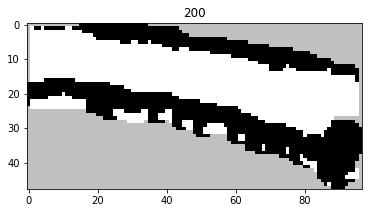

Robot Z position:  -2.11244500657552


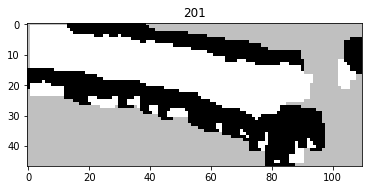

Robot Z position:  -2.126897222196038


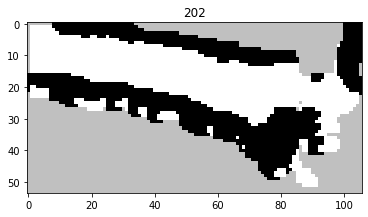

Robot Z position:  -2.1521632163768056


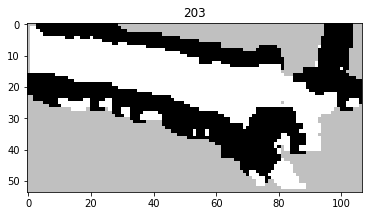

Robot Z position:  -2.141805514043274


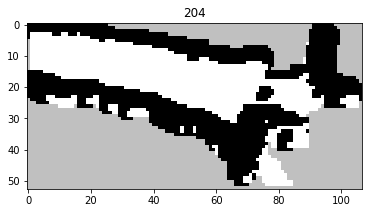

Robot Z position:  -2.169055743889326


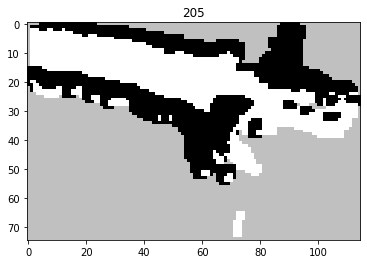

Robot Z position:  -2.185704796596219


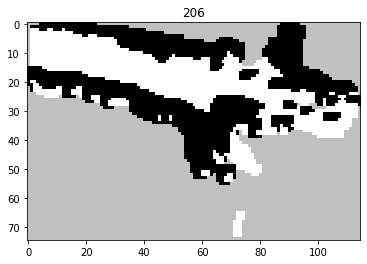

Robot Z position:  -2.1353225106899836


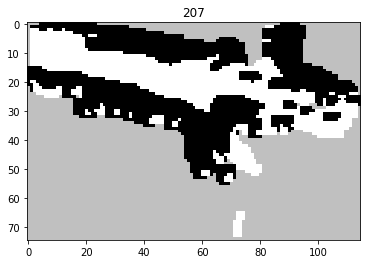

Robot Z position:  -2.1358674910131357


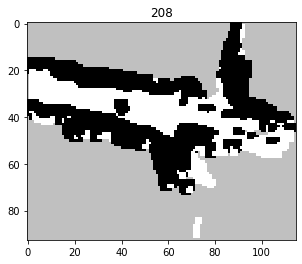

Robot Z position:  -2.1064251452852583


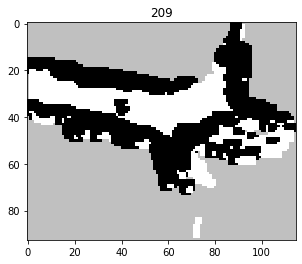

Robot Z position:  -2.179342581656409


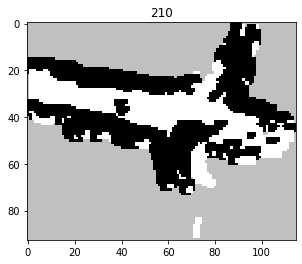

Robot Z position:  -2.1889066922171634


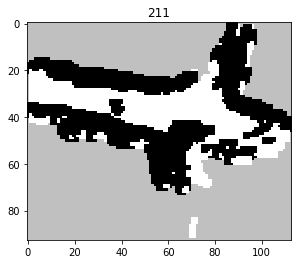

Robot Z position:  -2.1747859192174817


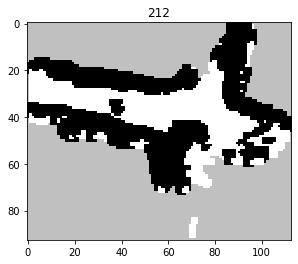

Robot Z position:  -2.14306536394914


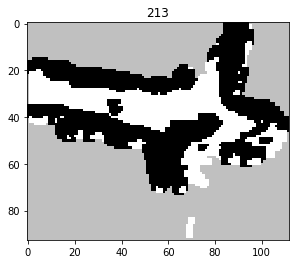

In [5]:
# read data
for ind in range(200, 214):
    elev_map = np.load('./data/elev_map{}.npy'.format(ind))
    robot_pose = np.load('./data/robot_pose{}.npy'.format(ind))
    # create occupancy grid based on elevation map
    grid, elev_grid = create_grid(elev_map, robot_pose[2], map_res, margin, safety_distance, unexplored_value)
    print('Robot Z position: ', robot_pose[2])
    X = elev_map[:,0]; Y = elev_map[:,1]; Z = elev_map[:,2]
    
    plt.figure()
    # plt.subplot(1,2,1)
    plt.imshow(1-grid, cmap='gray')
    plt.title(str(ind))
    
#     plt.subplot(1,2,2)
#     plt.plot(X,Z)
#     plt.ylim([-2., 2.])
#     print('Mean elevation height: ', np.mean(Z))
    plt.show();

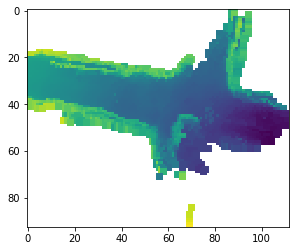

In [6]:
plt.imshow(elev_grid)

In [7]:
np.arcsin(10./15) / np.pi * 180

41.810314895778596